*Data Analysis

This block is meant to explore the provided data.

The several graphs show different comparision methods:
- Actions count
- Steering intensity
- Average steering



data shape (lines, columns)
(8036, 7)

steering array shape
(8036,)

steering array shape normalized
(8036, 1)

Left steering; No steering; Right steering


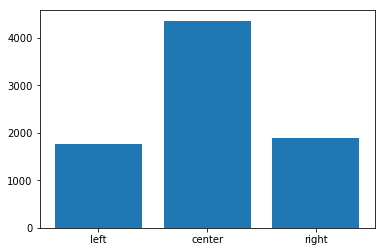


Left vs right steering ratio (just actions count)
0.9342105263157895

average left turn
-0.146281496939

average right turn
0.153870166722

Left and right total steering (considers intensity)


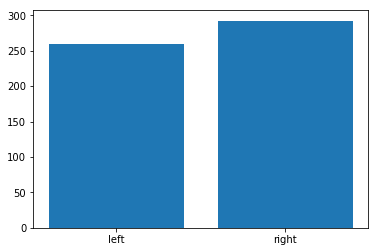


Left vs right absolute steering ratio (considers intensity)
0.888136518969

Left vs right difference
-32.703659705

From extreme left to extreme right steering action count
24
280
633
838
4361
724
844
312
20

sum of above values
8036

Histogram 20 steps


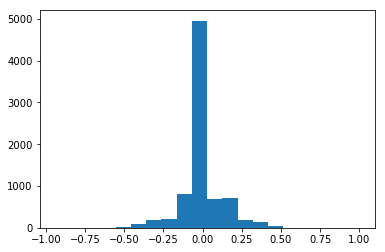

Steering distribution - values from extreme left to extreme right displayed above


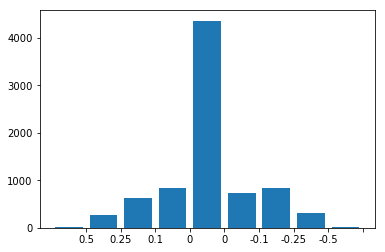

In [15]:
#Data analysis

import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

lines = lines[1:]
lines = np.array(lines)

print("")
print("data shape (lines, columns)")
print(lines.shape)
steering = lines[:,3]
print("")
print("steering array shape")
print(steering.shape)
steering = np.expand_dims(steering, axis=1)
print("")
print("steering array shape normalized")
print(steering.shape)
steering = np.array(steering).astype(np.float)

left = [x for x in steering if float(x[0]) < 0]
center = [x for x in steering if float(x[0]) == 0]
right = [x for x in steering if float(x[0]) > 0]

print("")
print("Left steering; No steering; Right steering")
x = np.arange(3)
plt.bar(x, height= [len(left),len(center),len(right)])
plt.xticks(x, ['left','center','right']);
plt.show()

print("")
print("Left vs right steering ratio (just actions count)")
print(len(left)/len(right))

sum_left = 0
for i in left:
    sum_left += i[0]
    
print("")
print("average left turn")
print(sum_left/len(left))

sum_right = 0
for i in right:
    sum_right += i[0]
    
print("")
print("average right turn")
print(sum_right/len(right))

print("")
print("Left and right total steering (considers intensity)")
x = np.arange(2)
plt.bar(x, height= [abs(sum_left),abs(sum_right)])
plt.xticks(x, ['left','right']);
plt.show()

print("")
print("Left vs right absolute steering ratio (considers intensity)")
print(abs(sum_left)/abs(sum_right))

print("")
print("Left vs right difference")
print(abs(sum_left)-abs(sum_right))

left_huge = [x for x in steering if float(x[0]) < -0.5]
left_big = [x for x in steering if -0.5 <= float(x[0]) < -0.25]
left_medium = [x for x in steering if -0.25 <= float(x[0]) < -0.1]
left_small = [x for x in steering if -0.1 <= float(x[0]) < 0]

right_small = [x for x in steering if 0 < float(x[0]) <= 0.1]
right_medium = [x for x in steering if 0.1 < float(x[0]) <= 0.25]
right_big = [x for x in steering if 0.25 < float(x[0]) <= 0.5]
right_huge = [x for x in steering if 0.5 < float(x[0])]


print("")
print("From extreme left to extreme right steering action count")
print(len(left_huge))
print(len(left_big))
print(len(left_medium))
print(len(left_small))
print(len(center))
print(len(right_small))
print(len(right_medium))
print(len(right_big))
print(len(right_huge))
print("")
print("sum of above values")
print(len(left_huge)+len(left_big)+len(left_medium)+len(left_small)+len(center)+len(right_small)+len(right_medium)+len(right_big)+len(right_huge))
print("")
   
print("Histogram 20 steps")
plt.hist(steering, bins=20)
plt.show()

print("Steering distribution - values from extreme left to extreme right displayed above")
x = np.arange(9)
plt.bar(x, height= [len(left_huge),len(left_big),len(left_medium),len(left_small),len(center),len(right_small),len(right_medium),len(right_big),len(right_huge)])
plt.xticks(x+.5, ['0.5','0.25','0.1','0','0','-0.1','-0.25','-0.5']);
plt.show()


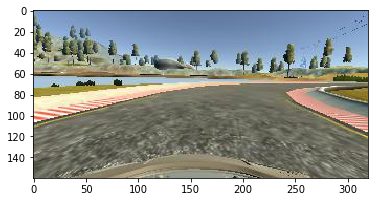

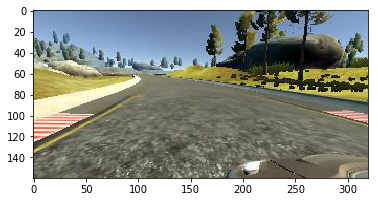

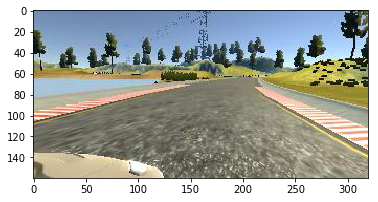

In [2]:
import matplotlib.image as mpimg
import os, random

sample = np.zeros((3,160,320,3))

for i in range(3):
    filename = random.choice(os.listdir('data/IMG/')) 
    image = mpimg.imread('data/IMG/'+filename)
    sample[i] = image
    
    plt.imshow(image)
    plt.show()


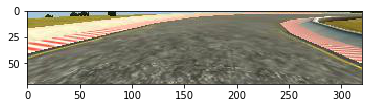

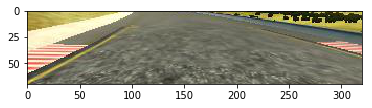

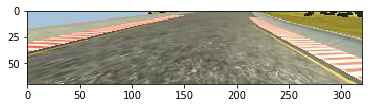

In [3]:
top_cut = 66
bottom_cut = 24

cutted_image = np.zeros((6,70,320,3), dtype=np.uint8)

for i in range(3):
    result_image = sample[i]
    result_image = result_image[top_cut:]
    cutted_image[i] = result_image[:result_image.shape[0]-bottom_cut]
    
    plt.imshow(cutted_image[i])
    plt.show()

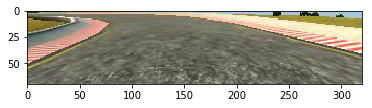

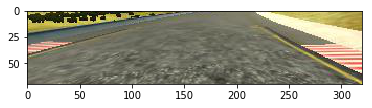

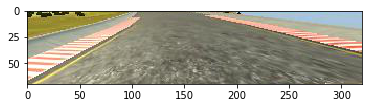

In [4]:
import cv2

for i in range(3):
    flipped_image = cv2.flip(cutted_image[i], 1)
    
    plt.imshow(flipped_image)
    plt.show()
    

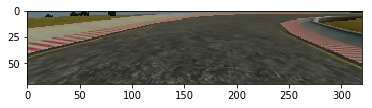

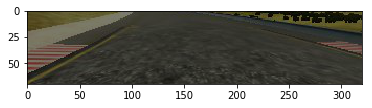

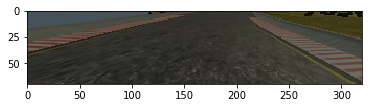

In [5]:
#Data pre-processing

for i in range(3):
    img = cv2.cvtColor(cutted_image[i],cv2.COLOR_RGB2HSV)
    img[:,:,2] = img[:,:,2]*(np.random.uniform(0.25,1.25))
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    
    plt.imshow(img)
    plt.show()
    

In [ ]:
#model1: 

import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
counter = 0
for line in lines:
    if counter > 0:
        source_path = line[0]
        filename = source_path.split('/')[-1]
        current_path = 'data/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)
    counter += 1
    
X_train = np.array(images)
y_train = np.array(measurements)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda

model = Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=7)

model.save('model1.h5')

In [ ]:
#model2: 

import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
counter = 0
for line in lines:
    if counter > 0:
        source_path = line[0]
        filename = source_path.split('/')[-1]
        current_path = 'data/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)
    counter += 1
    
X_train = np.array(images)
y_train = np.array(measurements)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda

model = Sequential()
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160,320,3)))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=7)

model.save('model2.h5')

In [ ]:
#model3: 

import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
counter = 0
for line in lines:
    if counter > 0:
        source_path = line[0]
        filename = source_path.split('/')[-1]
        current_path = 'data/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)
    counter += 1
    
X_train = np.array(images)
y_train = np.array(measurements)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160,320,3)))
model.add(Convolution2D(6,5,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Convolution2D(6,5,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)

model.save('model3.h5')

In [ ]:
#model4: 

import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.#model1: 


    for line in reader:
        lines.append(line)
        
images = []
measurements = []
counter = 0
for line in lines:
    if counter > 0:
        source_path = line[0]
        filename = source_path.split('/')[-1]
        current_path = 'data/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)
        measurement = float(line[3])
        measurements.append(measurement)
    counter += 1

augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160,320,3)))
model.add(Convolution2D(6,5,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Convolution2D(6,5,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)

model.save('model4.h5')

In [ ]:
#model5: 

import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
counter = 0
for line in lines:
    if counter > 0:
        for i in range(3):
            source_path = line[i]
            filename = source_path.split('/')[-1]
            current_path = 'data/IMG/' + filename
            image = cv2.imread(current_path)
            images.append(image)
            measurement = float(line[3])
            if i == 1:
                measurement += 0.2
            if i == 2:
                measurement -= 0.2
            measurements.append(measurement)
    counter += 1

augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160,320,3)))
model.add(Convolution2D(6,5,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Convolution2D(6,5,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)

model.save('model5.h5')

In [ ]:
#model6: 

import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
counter = 0
for line in lines:
    if counter > 0:
        for i in range(3):
            source_path = line[i]
            filename = source_path.split('/')[-1]
            current_path = 'data/IMG/' + filename
            image = cv2.imread(current_path)
            images.append(image)
            measurement = float(line[3])
            if i == 1:
                measurement += 0.2
            if i == 2:
                measurement -= 0.2
            measurements.append(measurement)
    counter += 1

augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Convolution2D(6,5,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Convolution2D(6,5,5,activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)

model.save('model6.h5')

In [ ]:
#model7: 

import csv
import cv2
import numpy as np

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
counter = 0
for line in lines:
    if counter > 0:
        for i in range(3):
            source_path = line[i]
            filename = source_path.split('/')[-1]
            current_path = 'data/IMG/' + filename
            image = cv2.imread(current_path)
            images.append(image)
            measurement = float(line[3])
            if i == 1:
                measurement += 0.2
            if i == 2:
                measurement -= 0.2
            measurements.append(measurement)
    counter += 1

augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)

model.save('model7.h5')

In [ ]:
from keras.models import Model
import matplotlib.pyplot as plt

history_object = model.fit_generator(train_generator, samples_per_epoch =
    len(train_samples), validation_data = 
    validation_generator,
    nb_val_samples = len(validation_samples), 
    nb_epoch=5, verbose=1)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


Model training

In [14]:
np.random.uniform(0.25,1.25)

0.9786458844202135

In [31]:
import os
import csv
import cv2
import numpy as np
import sklearn
from keras.models import Model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

batch_size = 32

top_cut = 70
bottom_cut = 25
        
def mirror_image(image):
    
    return cv2.flip(image, 1)
        
def brightness(image):
    
    img = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    img[:,:,2] = img[:,:,2]*(np.random.uniform(0.25,1.25))
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    
    return img

samples = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
        
samples = samples[1:]

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                name_center = 'data/IMG/'+batch_sample[0].split('/')[-1]
                center_image = cv2.cvtColor(cv2.imread(name_center),cv2.COLOR_BGR2RGB)
                name_left = 'data/IMG/'+batch_sample[1].split('/')[-1]
                left_image = cv2.cvtColor(cv2.imread(name_left),cv2.COLOR_BGR2RGB)
                name_right = 'data/IMG/'+batch_sample[2].split('/')[-1]
                right_image = cv2.cvtColor(cv2.imread(name_right),cv2.COLOR_BGR2RGB)
                center_angle = float(batch_sample[3])
                left_angle = float(batch_sample[3])+0.15
                right_angle = float(batch_sample[3])-0.15
                images.append(brightness(center_image))
                images.append(brightness(left_image))
                images.append(brightness(right_image))
                angles.append(center_angle)
                angles.append(left_angle)
                angles.append(right_angle)
                if abs(float(batch_sample[3]))>0.1:
                    mirror_center = mirror_image(center_image)
                    mirror_left = mirror_image(left_image)
                    mirror_right = mirror_image(right_image)
                    mirror_center_angle = float(center_angle)*-1.0
                    mirror_left_angle = float(left_angle)*-1.0
                    mirror_right_angle = float(right_angle)*-1.0
                    
                    images.append(brightness(mirror_center))
                    images.append(brightness(mirror_left))
                    images.append(brightness(mirror_right))
                    angles.append(mirror_center_angle)
                    angles.append(mirror_left_angle)
                    angles.append(mirror_right_angle)

            # trim image to only see section with road
            # images = np.asarray(images)
            # X_train = np.array(brightness_process_image(images))
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

model = Sequential()
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((top_cut,bottom_cut),(0,0))))
model.add(Convolution2D(24,(5,5),activation="relu",strides=(2,2)))
model.add(Dropout(.4))
model.add(Convolution2D(36,(5,5),activation="relu",strides=(2,2)))
model.add(Dropout(.4))
model.add(Convolution2D(48,(5,5),activation="relu",strides=(2,2)))
model.add(Dropout(.4))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(Dropout(.4))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(Dropout(.4))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
#model.fit_generator(train_generator, validation_data=validation_generator, samples_per_epoch= len(train_samples), nb_val_samples=len(validation_samples), nb_epoch=3)
model.fit_generator(train_generator, 
                    validation_data=validation_generator, 
                    steps_per_epoch= len(train_samples)/batch_size, 
                    epochs=3, 
                    validation_steps=len(validation_samples)/batch_size)

model.save('modelK.h5')

Epoch 1/3
201/200 [==============================] - 195s - loss: 0.0351 - val_loss: 0.0201
Epoch 2/3
201/200 [==============================] - 195s - loss: 0.0197 - val_loss: 0.0193
Epoch 3/3
201/200 [==============================] - 195s - loss: 0.0179 - val_loss: 0.0177


In [ ]:
#Jeremy
from keras.models import Sequential, model_from_json

from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda

from keras.layers.convolutional import Convolution2D

from keras.layers.pooling import MaxPooling2D

from keras.layers.advanced_activations import ELU

from keras.regularizers import l2#, activity_l2

from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, Callback

from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle

import math

import numpy as np

from PIL import Image         

import cv2                 

import matplotlib.pyplot as plt

from os import getcwd

import csv

# Fix error with TF and Keras

import tensorflow as tf

tf.python.control_flow_ops = tf



# example of opening/displaying image w/ pillow

#img = Image.open('test.png')

#img.show() 



# example of opening/displaying image w/ cv2

#img = cv2.imread('test.png')

#cv2.imshow('image',img)

#cv2.waitKey(0)

#cv2.destroyAllWindows()



def displayCV2(img):

    '''

    Utility method to display a CV2 Image

    '''

    cv2.imshow('image',img)

    cv2.waitKey(0)

    cv2.destroyAllWindows()



def process_img_for_visualization(image, angle, pred_angle, frame):

    '''

    Used by visualize_dataset method to format image prior to displaying. Converts colorspace back to original BGR, applies text to display steering angle and frame number (within batch to be visualized), and applies lines representing steering angle and model-predicted steering angle (if available) to image.

    '''    

    font = cv2.FONT_HERSHEY_SIMPLEX

    img = cv2.cvtColor(image, cv2.COLOR_YUV2BGR)

    img = cv2.resize(img,None,fx=3, fy=3, interpolation = cv2.INTER_CUBIC)

    h,w = img.shape[0:2]

    # apply text for frame number and steering angle

    cv2.putText(img, 'frame: ' + str(frame), org=(2,18), fontFace=font, fontScale=.5, color=(200,100,100), thickness=1)

    cv2.putText(img, 'angle: ' + str(angle), org=(2,33), fontFace=font, fontScale=.5, color=(200,100,100), thickness=1)

    # apply a line representing the steering angle

    cv2.line(img,(int(w/2),int(h)),(int(w/2+angle*w/4),int(h/2)),(0,255,0),thickness=4)

    if pred_angle is not None:

        cv2.line(img,(int(w/2),int(h)),(int(w/2+pred_angle*w/4),int(h/2)),(0,0,255),thickness=4)

    return img

    

def visualize_dataset(X,y,y_pred=None):

    '''

    format the data from the dataset (image, steering angle) and display

    '''

    for i in range(len(X)):

        if y_pred is not None:

            img = process_img_for_visualization(X[i], y[i], y_pred[i], i)

        else: 

            img = process_img_for_visualization(X[i], y[i], None, i)

        displayCV2(img)        



def preprocess_image(img):

    '''

    Method for preprocessing images: this method is the same used in drive.py, except this version uses

    BGR to YUV and drive.py uses RGB to YUV (due to using cv2 to read the image here, where drive.py images are 

    received in RGB)

    '''

    # original shape: 160x320x3, input shape for neural net: 66x200x3

    # crop to 105x320x3

    #new_img = img[35:140,:,:]

    # crop to 40x320x3

    new_img = img[50:140,:,:]

    # apply subtle blur

    new_img = cv2.GaussianBlur(new_img, (3,3), 0)

    # scale to 66x200x3 (same as nVidia)

    new_img = cv2.resize(new_img,(200, 66), interpolation = cv2.INTER_AREA)

    # scale to ?x?x3

    #new_img = cv2.resize(new_img,(80, 10), interpolation = cv2.INTER_AREA)

    # convert to YUV color space (as nVidia paper suggests)

    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2YUV)

    return new_img



def random_distort(img, angle):

    ''' 

    method for adding random distortion to dataset images, including random brightness adjust, and a random

    vertical shift of the horizon position

    '''

    new_img = img.astype(float)

    # random brightness - the mask bit keeps values from going beyond (0,255)

    value = np.random.randint(-28, 28)

    if value > 0:

        mask = (new_img[:,:,0] + value) > 255 

    if value <= 0:

        mask = (new_img[:,:,0] + value) < 0

    new_img[:,:,0] += np.where(mask, 0, value)

    # random shadow - full height, random left/right side, random darkening

    h,w = new_img.shape[0:2]

    mid = np.random.randint(0,w)

    factor = np.random.uniform(0.6,0.8)

    if np.random.rand() > .5:

        new_img[:,0:mid,0] *= factor

    else:

        new_img[:,mid:w,0] *= factor

    # randomly shift horizon

    h,w,_ = new_img.shape

    horizon = 2*h/5

    v_shift = np.random.randint(-h/8,h/8)

    pts1 = np.float32([[0,horizon],[w,horizon],[0,h],[w,h]])

    pts2 = np.float32([[0,horizon+v_shift],[w,horizon+v_shift],[0,h],[w,h]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    new_img = cv2.warpPerspective(new_img,M,(w,h), borderMode=cv2.BORDER_REPLICATE)

    return (new_img.astype(np.uint8), angle)



def generate_training_data(image_paths, angles, batch_size=128, validation_flag=False):

    '''

    method for the model training data generator to load, process, and distort images, then yield them to the

    model. if 'validation_flag' is true the image is not distorted. also flips images with turning angle magnitudes of greater than 0.33, as to give more weight to them and mitigate bias toward low and zero turning angles

    '''

    image_paths, angles = shuffle(image_paths, angles)

    X,y = ([],[])

    while True:       

        for i in range(len(angles)):

            img = cv2.imread(image_paths[i])

            angle = angles[i]

            img = preprocess_image(img)

            if not validation_flag:

                img, angle = random_distort(img, angle)

            X.append(img)

            y.append(angle)

            if len(X) == batch_size:

                yield (np.array(X), np.array(y))

                X, y = ([],[])

                image_paths, angles = shuffle(image_paths, angles)

            # flip horizontally and invert steer angle, if magnitude is > 0.33

            if abs(angle) > 0.33:

                img = cv2.flip(img, 1)

                angle *= -1

                X.append(img)

                y.append(angle)

                if len(X) == batch_size:

                    yield (np.array(X), np.array(y))

                    X, y = ([],[])

                    image_paths, angles = shuffle(image_paths, angles)





def generate_training_data_for_visualization(image_paths, angles, batch_size=20, validation_flag=False):

    '''

    method for loading, processing, and distorting images

    if 'validation_flag' is true the image is not distorted

    '''

    X = []

    y = []

    image_paths, angles = shuffle(image_paths, angles)

    for i in range(batch_size):

        img = cv2.imread(image_paths[i])

        angle = angles[i]

        img = preprocess_image(img)

        if not validation_flag:

            img, angle = random_distort(img, angle)

        X.append(img)

        y.append(angle)

    return (np.array(X), np.array(y))



'''

Main program 

'''



# select data source(s) here

using_my_data = True

using_udacity_data = True



data_to_use = [using_my_data, using_udacity_data]

img_path_prepend = ['', getcwd() + '/udacity_data/']

csv_path = ['./training_data/driving_log.csv', './udacity_data/driving_log.csv']



image_paths = []

angles = []



for j in range(2):

    if not data_to_use[j]:

        # 0 = my own data, 1 = Udacity supplied data

        print('not using dataset ', j)

        continue

    # Import driving data from csv

    with open(csv_path[j], newline='') as f:

        driving_data = list(csv.reader(f, skipinitialspace=True, delimiter=',', quoting=csv.QUOTE_NONE))





    # Gather data - image paths and angles for center, left, right cameras in each row

    for row in driving_data[1:]:

        # skip it if ~0 speed - not representative of driving behavior

        if float(row[6]) < 0.1 :

            continue

        # get center image path and angle

        image_paths.append(img_path_prepend[j] + row[0])

        angles.append(float(row[3]))

        # get left image path and angle

        image_paths.append(img_path_prepend[j] + row[1])

        angles.append(float(row[3])+0.25)

        # get left image path and angle

        image_paths.append(img_path_prepend[j] + row[2])

        angles.append(float(row[3])-0.25)



image_paths = np.array(image_paths)

angles = np.array(angles)



print('Before:', image_paths.shape, angles.shape)



# print a histogram to see which steering angle ranges are most overrepresented

num_bins = 23

avg_samples_per_bin = len(angles)/num_bins

hist, bins = np.histogram(angles, num_bins)

width = 0.7 * (bins[1] - bins[0])

center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, align='center', width=width)

plt.plot((np.min(angles), np.max(angles)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')

#plt.show()



# determine keep probability for each bin: if below avg_samples_per_bin, keep all; otherwise keep prob is proportional

# to number of samples above the average, so as to bring the number of samples for that bin down to the average

keep_probs = []

target = avg_samples_per_bin * .5

for i in range(num_bins):

    if hist[i] < target:

        keep_probs.append(1.)

    else:

        keep_probs.append(1./(hist[i]/target))

remove_list = []

for i in range(len(angles)):

    for j in range(num_bins):

        if angles[i] > bins[j] and angles[i] <= bins[j+1]:

            # delete from X and y with probability 1 - keep_probs[j]

            if np.random.rand() > keep_probs[j]:

                remove_list.append(i)

image_paths = np.delete(image_paths, remove_list, axis=0)

angles = np.delete(angles, remove_list)



# print histogram again to show more even distribution of steering angles

hist, bins = np.histogram(angles, num_bins)

plt.bar(center, hist, align='center', width=width)

plt.plot((np.min(angles), np.max(angles)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')

#plt.show()



print('After:', image_paths.shape, angles.shape)



# visualize a single batch of the data

X,y = generate_training_data_for_visualization(image_paths, angles)

visualize_dataset(X,y)



# split into train/test sets

image_paths_train, image_paths_test, angles_train, angles_test = train_test_split(image_paths, angles,

                                                                                  test_size=0.05, random_state=42)

print('Train:', image_paths_train.shape, angles_train.shape)

print('Test:', image_paths_test.shape, angles_test.shape)



###### ConvNet Definintion ######



# for debugging purposes - don't want to mess with the model if just checkin' the data

just_checkin_the_data = False



if not just_checkin_the_data:

    model = Sequential()



    # Normalize

    model.add(Lambda(lambda x: x/127.5 - 1.0,input_shape=(66,200,3)))



    # Add three 5x5 convolution layers (output depth 24, 36, and 48), each with 2x2 stride

    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode='valid', W_regularizer=l2(0.001)))

    model.add(ELU())

    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode='valid', W_regularizer=l2(0.001)))

    model.add(ELU())

    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode='valid', W_regularizer=l2(0.001)))

    model.add(ELU())



    #model.add(Dropout(0.50))

    

    # Add two 3x3 convolution layers (output depth 64, and 64)

    model.add(Convolution2D(64, 3, 3, border_mode='valid', W_regularizer=l2(0.001)))

    model.add(ELU())

    model.add(Convolution2D(64, 3, 3, border_mode='valid', W_regularizer=l2(0.001)))

    model.add(ELU())



    # Add a flatten layer

    model.add(Flatten())



    # Add three fully connected layers (depth 100, 50, 10), tanh activation (and dropouts)

    model.add(Dense(100, W_regularizer=l2(0.001)))

    model.add(ELU())

    #model.add(Dropout(0.50))

    model.add(Dense(50, W_regularizer=l2(0.001)))

    model.add(ELU())

    #model.add(Dropout(0.50))

    model.add(Dense(10, W_regularizer=l2(0.001)))

    model.add(ELU())

    #model.add(Dropout(0.50))



    # Add a fully connected output layer

    model.add(Dense(1))



    # Compile and train the model, 

    #model.compile('adam', 'mean_squared_error')

    model.compile(optimizer=Adam(lr=1e-4), loss='mse')



    ############  just for tweaking model ##############

    # pulling out 128 random samples and training just on them, to make sure the model is capable of overfitting

    # indices_train = np.random.randint(0, len(image_paths_train), 128)

    # indices_test = np.random.randint(0, len(image_paths_test), 12)

    # image_paths_train = image_paths_train[indices_train]

    # angles_train = angles_train[indices_train]

    # image_paths_test = image_paths_test[indices_test]

    # angles_test = angles_test[indices_test]

    #############################################################



    # initialize generators

    train_gen = generate_training_data(image_paths_train, angles_train, validation_flag=False, batch_size=64)

    val_gen = generate_training_data(image_paths_train, angles_train, validation_flag=True, batch_size=64)

    test_gen = generate_training_data(image_paths_test, angles_test, validation_flag=True, batch_size=64)



    checkpoint = ModelCheckpoint('model{epoch:02d}.h5')



    #history = model.fit(X, y, batch_size=128, nb_epoch=5, validation_split=0.2, verbose=2)

    history = model.fit_generator(train_gen, validation_data=val_gen, nb_val_samples=2560, samples_per_epoch=23040, 

                                  nb_epoch=5, verbose=2, callbacks=[checkpoint])

    # print('Test Loss:', model.evaluate_generator(test_gen, 128))



    print(model.summary())



    # visualize some predictions

    n = 12

    X_test,y_test = generate_training_data_for_visualization(image_paths_test[:n], angles_test[:n], batch_size=n,                                                                     validation_flag=True)

    y_pred = model.predict(X_test, n, verbose=2)

    visualize_dataset(X_test, y_test, y_pred)



    # Save model data

    model.save_weights('./model.h5')

    json_string = model.to_json()

    with open('./model.json', 'w') as f:

        f.write(json_string)

In [ ]:
#subodh
import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.layers import Convolution2D, ELU, Flatten, Dropout, Dense, Lambda, MaxPooling2D

from keras.preprocessing.image import img_to_array, load_img

import cv2

rows, cols, ch = 64, 64, 3

TARGET_SIZE = (64, 64)


def augment_brightness_camera_images(image):
    '''
    :param image: Input image
    :return: output image with reduced brightness
    '''
    # convert to HSV so that its easy to adjust brightness
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    # randomly generate the brightness reduction factor
    # Add a constant so that it prevents the image from being completely dark
    random_bright = .25+np.random.uniform()
    # Apply the brightness reduction to the V channel
    image1[:,:,2] = image1[:,:,2]*random_bright
    # convert to RBG again
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)

    return image1


def resize_to_target_size(image):
    return cv2.resize(image, TARGET_SIZE)


def crop_and_resize(image):
    '''
    :param image: The input image of dimensions 160x320x3
    :return: Output image of size 64x64x3
    '''
    cropped_image = image[55:135, :, :]
    processed_image = resize_to_target_size(cropped_image)

    return processed_image

def preprocess_image(image):
    image = crop_and_resize(image)
    image = image.astype(np.float32)
    #Normalize image
    image = image/255.0 - 0.5

    return image


def get_augmented_row(row):
    steering = row['steering']
    # randomly choose the camera to take the image from
    camera = np.random.choice(['center', 'left', 'right'])
    # adjust the steering angle for left anf right cameras
    if camera == 'left':
        steering += 0.25
    elif camera == 'right':
        steering -= 0.25

    image = load_img("udacity_data/" + row[camera].strip())
    image = img_to_array(image)
    # decide whether to horizontally flip the image:
    # This is done to reduce the bias for turning left that is present in the training data
    flip_prob = np.random.random()

    if flip_prob > 0.5:
        # flip the image and reverse the steering angle
        steering = -1*steering
        image = cv2.flip(image, 1)

    # Apply brightness augmentation
    image = augment_brightness_camera_images(image)
    # Crop, resize and normalize the image
    image = preprocess_image(image)

    return image, steering


def get_data_generator(data_frame, batch_size=32):
    N = data_frame.shape[0]
    batches_per_epoch = N // batch_size

    i = 0
    while(True):
        start = i*batch_size
        end = start+batch_size - 1
        X_batch = np.zeros((batch_size, 64, 64, 3), dtype=np.float32)
        y_batch = np.zeros((batch_size,), dtype=np.float32)
        j = 0
        # slice a `batch_size` sized chunk from the dataframe
        # and generate augmented data for each row in the chunk on the fly

        for index, row in data_frame.loc[start:end].iterrows():
            X_batch[j], y_batch[j] = get_augmented_row(row)
            j += 1

        i += 1
        if i == batches_per_epoch - 1:
            # reset the index so that we can cycle over the data_frame again
            i = 0

        yield X_batch, y_batch


def get_model():

    model = Sequential()
    # model.add(Lambda(preprocess_batch, input_shape=(160, 320, 3), output_shape=(64, 64, 3)))
    # layer 1 output shape is 32x32x32
    model.add(Convolution2D(32, 5, 5, input_shape=(64, 64, 3), subsample=(2, 2), border_mode="same"))
    model.add(ELU())
    # layer 2 output shape is 15x15x16
    model.add(Convolution2D(16, 3, 3, subsample=(1, 1), border_mode="valid"))
    model.add(ELU())
    model.add(Dropout(.4))
    model.add(MaxPooling2D((2, 2), border_mode='valid'))
    # layer 3 output shape is 12x12x16
    model.add(Convolution2D(16, 3, 3, subsample=(1, 1), border_mode="valid"))
    model.add(ELU())
    model.add(Dropout(.4))
    # Flatten the output
    model.add(Flatten())
    # layer 4
    model.add(Dense(1024))
    model.add(Dropout(.3))
    model.add(ELU())
    # layer 5
    model.add(Dense(512))
    model.add(ELU())
    # Finally a single output, since this is a regression problem
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")

    return model



if __name__ == "__main__":

    BATCH_SIZE = 32
    data_frame = pd.read_csv('udacity_data/driving_log.csv', usecols=[0, 1, 2, 3])
    
    # shuffle the data
    data_frame = data_frame.sample(frac=1).reset_index(drop=True)
    
    # 80-20 training validation split
    training_split = 0.8
    num_rows_training = int(data_frame.shape[0]*training_split)
    training_data = data_frame.loc[0:num_rows_training-1]
    validation_data = data_frame.loc[num_rows_training:]
    
    # release the main data_frame from memory
    data_frame = None
    training_generator = get_data_generator(training_data, batch_size=BATCH_SIZE)
    validation_data_generator = get_data_generator(validation_data, batch_size=BATCH_SIZE)
    model = get_model()

    samples_per_epoch = (20000//BATCH_SIZE)*BATCH_SIZE

    model.fit_generator(training_generator, validation_data=validation_data_generator,

                        samples_per_epoch=samples_per_epoch, nb_epoch=3, nb_val_samples=3000)

    print("Saving model weights and configuration file.")



    model.save_weights('model.h5')  # always save your weights after training or during training

    with open('model.json', 'w') as outfile:

        outfile.write(model.to_json())